Exercises:


E01: train a trigram language model, i.e. take two characters as an input to predict the 3rd one. Feel free to use either counting or a neural net. Evaluate the loss; Did it improve over a bigram model?


E02: split up the dataset randomly into 80% train set, 10% dev set, 10% test set. Train the bigram and trigram models only on the training set. Evaluate them on dev and test splits. What can you see?


E03: use the dev set to tune the strength of smoothing (or regularization) for the trigram model - i.e. try many possibilities and see which one works best based on the dev set loss. What patterns can you see in the train and dev set loss as you tune this strength? Take the best setting of the smoothing and evaluate on the test set once and at the end. How good of a loss do you achieve?


E04: we saw that our 1-hot vectors merely select a row of W, so producing these vectors explicitly feels wasteful. Can you delete our use of F.one_hot in favor of simply indexing into rows of W?


E05: look up and use F.cross_entropy instead. You should achieve the same result. Can you think of why we'd prefer to use F.cross_entropy instead?

In [1]:
words = open('names.txt').read().splitlines()
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

Implement counting trigram

We map the characters into

In [2]:
stoi = {s:i+1 for i,s in enumerate(sorted(set(''.join(words))))}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [3]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

We want to predict from 3 char the fourth, first implementation is counting trigram

Count how many trigrams appear in dataset

In [4]:
import torch

start at ones to overcome not appeared chars in dataset

In [55]:
dimensions = 4

In [56]:
N = torch.zeros([27] * dimensions, dtype=torch.float32)

In [57]:
for w in words:
    context = [0] * dimensions
    for ch in w + '.':
        ix = stoi[ch]
        context = context[1:] + [ix]
        N[*context] += 1
        # r = list(map(lambda num: itos[num], context))


In [58]:
N.sum()

tensor(228146.)

In [59]:
import matplotlib.pyplot as plt

when first character is 0, this is the probability distribution of next tuple. 

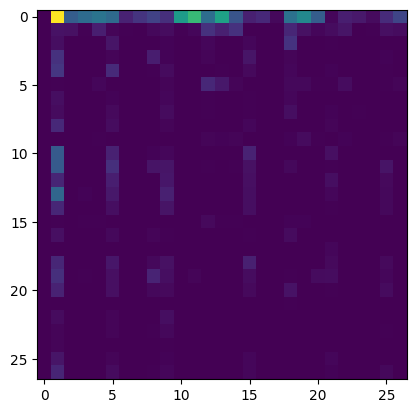

In [61]:
plt.imshow(N[0][0])

I want to make smthn like, if u give me 2 char i will predict the 3rd

First we transform N into prob distributions

In [64]:
p = N.softmax(dim=dimensions-1)
p.shape

torch.Size([27, 27, 27, 27])

Make predictions

In [73]:
start = 'fil'

context = list(map(lambda ch: stoi[ch], start))

print(start, end='')
while True:
    sampling = torch.multinomial(p[*context], num_samples=1, replacement=True)
    context = context[1:] + [sampling.item()]
    if sampling.item() == 0:
        break
    print(itos[sampling.item()], end='')


filian

Make it compact

In [118]:
def train_ngram(dimensions):
    # Map characters to integers and viceversa
    stoi = {s:i+1 for i,s in enumerate(sorted(set(''.join(words))))}
    stoi['.'] = 0

    # Count occurrences of n-grams
    N = torch.zeros([27] * dimensions, dtype=torch.float32)
    for w in words:
        context = [0] * dimensions
        for ch in w + '.':
            ix = stoi[ch]
            context = context[1:] + [ix]
            N[*context] += 1

    # Convert counts to probabilities
    p = N.softmax(dim=dimensions-1)
    return p

In [133]:
def predict_ngram(p, start):
    dimensions = p.dim()
    if len(start) != dimensions -1:
        raise ValueError(f'start must be {dimensions -1} characters long')
    
    # Generate new names
    context = list(map(lambda ch: stoi[ch], start))

    print(start, end='')
    while True:
        sampling = torch.multinomial(p[*context], num_samples=1, replacement=True)
        context = context[1:] + [sampling.item()]
        if sampling.item() == 0:
            break
        print(itos[sampling.item()], end='')
    print()


In [134]:
p2 = train_ngram(2)
p3 = train_ngram(3)
p4 = train_ngram(4)
p5 = train_ngram(5)
p6 = train_ngram(6)

In [135]:
predict_ngram(p2, 'a')
predict_ngram(p3, 'al')
predict_ngram(p4, 'ale')
predict_ngram(p5, 'ales')
predict_ngram(p6, 'aless')

a
alee
alee
alessiah
alessckt
